In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [37]:
# Project 1: Data Manipulation, Handling Missing Data, Data Visualization
# Step 1: Load the dataset

# data_url = "data/titanic.csv"
# df = pd.read_csv(data_url)

df = pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
# Step 2: Find features with null values
null_columns = df.columns[df.isnull().any()].tolist()
print("Columns with Null Values:", null_columns)

Columns with Null Values: ['Age', 'Cabin', 'Embarked']


In [39]:
# Step 3: Fill null values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df

<ipython-input-39-e69ba90ae2bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-39-e69ba90ae2bd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


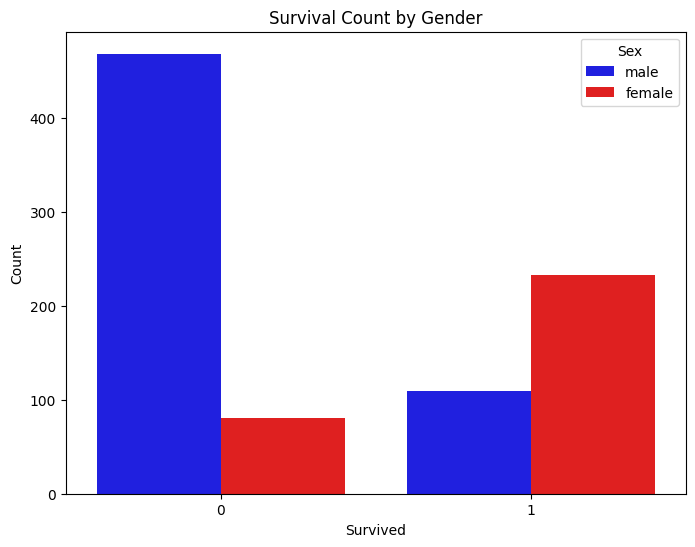

In [40]:
# Step 4: Plot Survived vs Dead with Male/Female distinctions
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=df, palette={'male':'blue', 'female':'red'})
plt.title("Survival Count by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

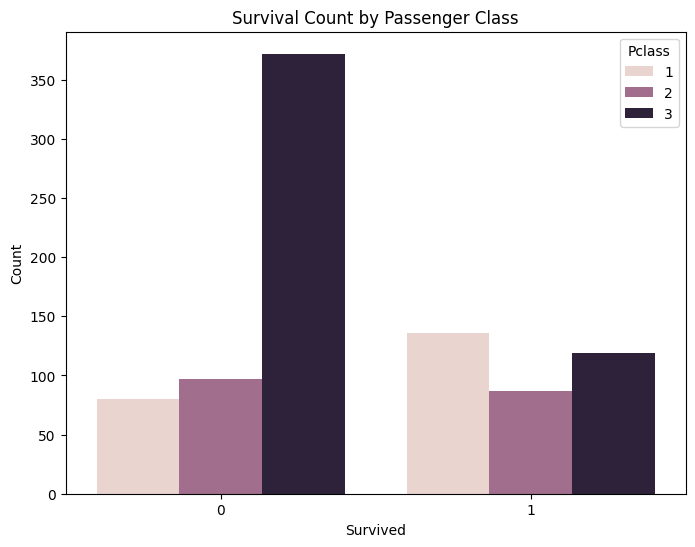

In [41]:
# Step 5: Plot Survived vs Dead by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [42]:
# Step 6: Create AgeClass column
df['AgeClass'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, 100], labels=[0, 1, 2, 3, 4]).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [43]:
# Step 7: Drop Age column
df.drop(columns=['Age'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,Unknown,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,Unknown,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,1


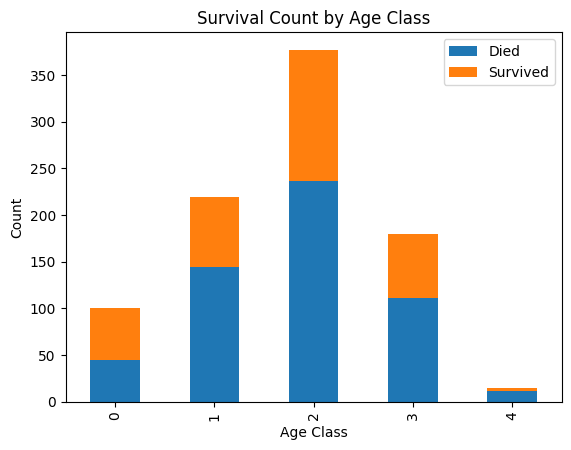

In [44]:
# Step 8: Plot Survived vs Dead based on AgeClass
grouped = df.groupby(['AgeClass', 'Survived']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title("Survival Count by Age Class")
plt.xlabel("Age Class")
plt.ylabel("Count")
plt.legend(["Died", "Survived"])
plt.show()

In [45]:
# Project 2: Dataset Merging, Data Manipulation, K-Means Clustering

# Step 1 & 2: Create CSV files (Simulated data)
data1 = {'Registration Number': range(1001, 1051),
         'Name': [f'Student{i}' for i in range(1, 51)],
         'TT-1 Marks': np.random.randint(40, 100, 50)}
df1 = pd.DataFrame(data1)
df1.to_csv('term-test-1-result.csv', index=False)

data2 = {'Registration Number': range(1001, 1051),
         'Name': [f'Student{i}' for i in range(1, 51)],
         'TT-2 Marks': np.random.randint(40, 100, 50)}
df2 = pd.DataFrame(data2)
df2.to_csv('term-test-2-result.csv', index=False)

In [46]:
# Step 3: Load the datasets and merge
df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')
merged_df = pd.merge(df1, df2, on=['Registration Number', 'Name'])
merged_df

,Registration Number,Name,TT-1 Marks,TT-2 Marks
0,1001,Student1,44,52
1,1002,Student2,62,82
2,1003,Student3,49,79
3,1004,Student4,59,52
4,1005,Student5,49,79
5,1006,Student6,94,47
6,1007,Student7,93,48
7,1008,Student8,94,56
8,1009,Student9,94,51
9,1010,Student10,66,53


In [47]:
# Step 4: Compute best and average marks
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)
merged_df

,Registration Number,Name,TT-1 Marks,TT-2 Marks,Best Marks,Average Marks
0,1001,Student1,44,52,52,48.0
1,1002,Student2,62,82,82,72.0
2,1003,Student3,49,79,79,64.0
3,1004,Student4,59,52,59,55.5
4,1005,Student5,49,79,79,64.0
5,1006,Student6,94,47,94,70.5
6,1007,Student7,93,48,93,70.5
7,1008,Student8,94,56,94,75.0
8,1009,Student9,94,51,94,72.5
9,1010,Student10,66,53,66,59.5


In [48]:
# Step 5: Drop TT-1 and TT-2 Marks columns
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)
merged_df

,Registration Number,Name,Best Marks,Average Marks
0,1001,Student1,52,48.0
1,1002,Student2,82,72.0
2,1003,Student3,79,64.0
3,1004,Student4,59,55.5
4,1005,Student5,79,64.0
5,1006,Student6,94,70.5
6,1007,Student7,93,70.5
7,1008,Student8,94,75.0
8,1009,Student9,94,72.5
9,1010,Student10,66,59.5


In [49]:
# Step 6: Save final dataframe to CSV
merged_df.to_csv('final-term-test-result.csv', index=False)

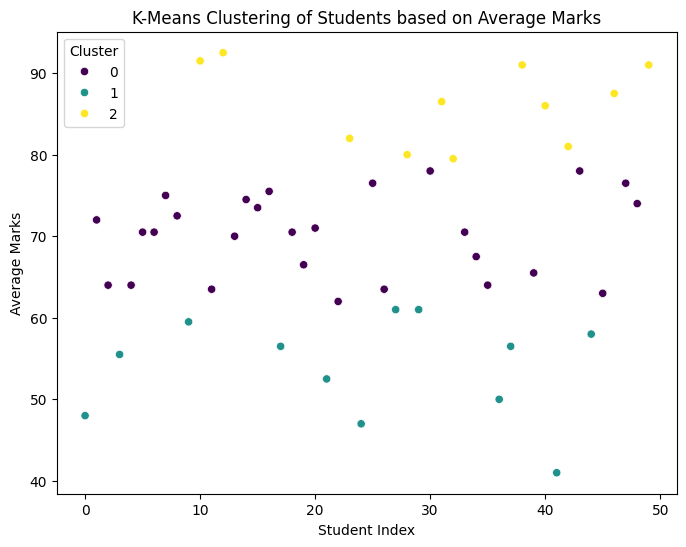

In [51]:
# Step 7: Apply K-Means clustering and visualize
X = merged_df[['Average Marks']]
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df.index, y=merged_df['Average Marks'], hue=merged_df['Cluster'], palette='viridis')
plt.title("K-Means Clustering of Students based on Average Marks")
plt.xlabel("Student Index")
plt.ylabel("Average Marks")
plt.show()
# merged_df